In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import DBSCAN
#inspired by https://www.kaggle.com/lambertosu/exploratory-analysis-with-density-based-clustering
#steps:
#Deal with data
#Separate the data in Weekday and 8-12, 12-6, 6-8 and plot with seaborn
#Find the most pick up pariod and use clustering to find which region

In [2]:
%matplotlib inline

In [3]:
uber_data = pd.read_csv('uber-raw-data-aug14.csv')
uber_data.head()
uber_data[20:30]

,Date/Time,Lat,Lon,Base
20,8/1/2014 0:48:00,40.7421,-74.0002,B02512
21,8/1/2014 0:52:00,40.7394,-74.0069,B02512
22,8/1/2014 0:53:00,40.7153,-73.9666,B02512
23,8/1/2014 0:54:00,40.6888,-73.9853,B02512
24,8/1/2014 0:54:00,40.7194,-74.0428,B02512
25,8/1/2014 0:55:00,40.7562,-73.9714,B02512
26,8/1/2014 0:58:00,40.7601,-73.9839,B02512
27,8/1/2014 1:01:00,40.7585,-73.9732,B02512
28,8/1/2014 1:08:00,40.7711,-73.9832,B02512
29,8/1/2014 1:09:00,40.7133,-74.0092,B02512


In [4]:
#taxi_data = pd.read_csv('nyc_taxi_data_2014.csv')
#taxi_data.head()

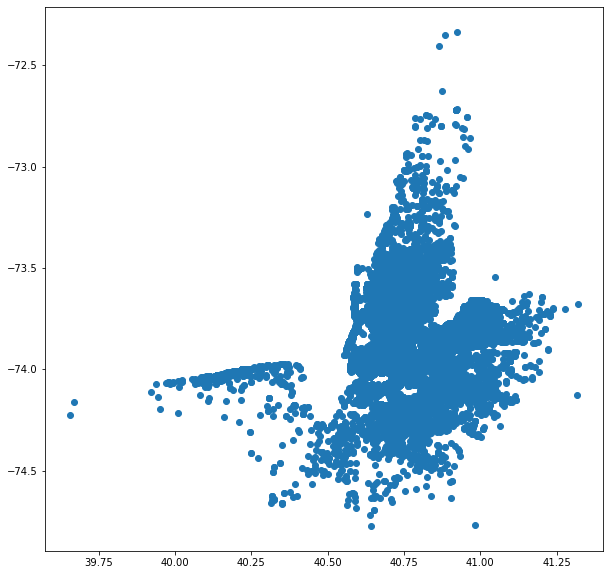

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(uber_data["Lat"], uber_data["Lon"])
plt.show()
#we obtain a scatter map but it is mass so use clustering

In [6]:
#Deal with data
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format = '%m/%d/%Y %H:%M:%S')

In [7]:
uber_data['WeekDay'] = uber_data['Date/Time'].dt.dayofweek
uber_data['WeekDayName'] = uber_data['Date/Time'].dt.strftime("%A") 
uber_data['Month'] = uber_data['Date/Time'].dt.month
uber_data['Day'] = uber_data['Date/Time'].dt.day
uber_data['Hour'] = uber_data['Date/Time'].dt.hour

In [8]:
uber_data['Period'] = 'NaN'
uber_data.loc[(uber_data.Hour >=0)&(uber_data.Hour<=12), 'Period'] = 'AM'
uber_data.loc[(uber_data.Hour >12)&(uber_data.Hour<=18), 'Period'] = 'PM'
uber_data.loc[(uber_data.Hour >18)&(uber_data.Hour<=24), 'Period'] = 'Night'
uber_data['Count'] = 1
uber_data

,Date/Time,Lat,Lon,Base,WeekDay,WeekDayName,Month,Day,Hour,Period,Count
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,Friday,8,1,0,AM,1
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,Friday,8,1,0,AM,1
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,Friday,8,1,0,AM,1
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,Friday,8,1,0,AM,1
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,Friday,8,1,0,AM,1
...,...,...,...,...,...,...,...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,Sunday,8,31,23,Night,1
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,Sunday,8,31,23,Night,1
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,6,Sunday,8,31,23,Night,1
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,6,Sunday,8,31,23,Night,1


In [9]:
uber_weekdays = uber_data.pivot_table(index=['WeekDayName'], values='Base', aggfunc='count')

In [10]:
uber_weekdays

,Base
WeekDayName,
Friday,148674
Monday,91633
Saturday,132225
Sunday,110246
Thursday,124117
Tuesday,107124
Wednesday,115256


In [11]:
uber_period = uber_data.pivot_table(index=['WeekDayName', 'Period'], values='Count', aggfunc='sum')
uber_period

Count
WeekDayName Period       
Friday      AM      53600
            Night   44167
            PM      50907
Monday      AM      37327
            Night   21871
            PM      32435
Saturday    AM      44713
            Night   43215
            PM      44297
Sunday      AM      44861
            Night   25948
            PM      39437
Thursday    AM      41881
            Night   39622
            PM      42614
Tuesday     AM      37851
            Night   29057
            PM      40216
Wednesday   AM      42791
            Night   31773
            PM      40692

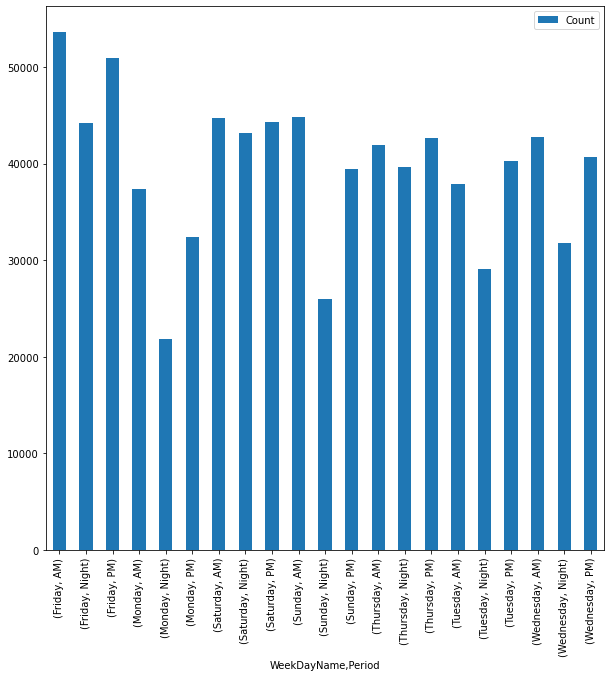

In [12]:
uber_period.plot(kind='bar', figsize = (10, 10))

Text(0.5, 1.0, '19:00 - 23:59 count by weekday')

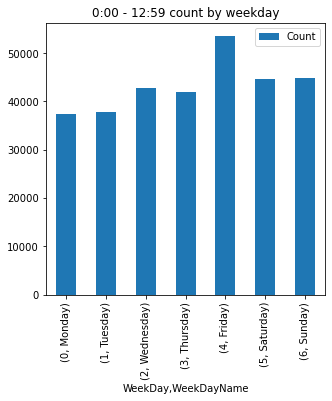

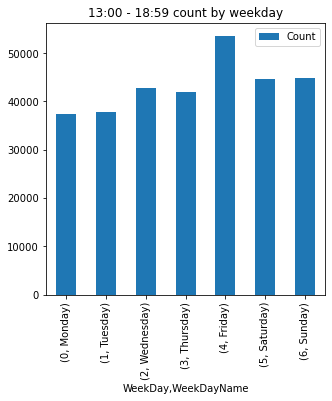

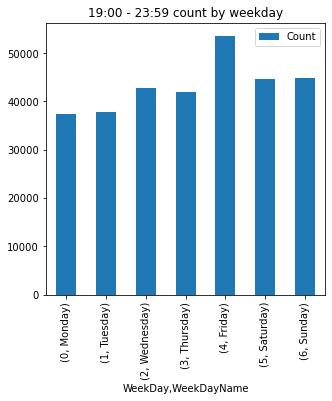

In [13]:
uber_am = uber_data.loc[uber_data.Period == 'AM']
uber_am_weekday = uber_am.pivot_table(index=['WeekDay','WeekDayName'], values='Count', aggfunc='sum')
uber_am_weekday.plot(kind='bar', figsize = (5, 5))
plt.title('0:00 - 12:59 count by weekday')
uber_pm = uber_data.loc[uber_data.Period == 'PM']
uber_pm_weekday = uber_am.pivot_table(index=['WeekDay','WeekDayName'], values='Count', aggfunc='sum')
uber_pm_weekday.plot(kind='bar', figsize = (5, 5))
plt.title('13:00 - 18:59 count by weekday')
uber_ni = uber_data.loc[uber_data.Period == 'Night']
uber_ni_weekday = uber_am.pivot_table(index=['WeekDay','WeekDayName'], values='Count', aggfunc='sum')
uber_ni_weekday.plot(kind='bar', figsize = (5, 5))
plt.title('19:00 - 23:59 count by weekday')
#'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

In [14]:
uber_friday = uber_data.loc[uber_data.WeekDayName == 'Friday']

uber_monday = uber_data.loc[uber_data.WeekDayName == 'Monday']
uber_tuesday = uber_data.loc[uber_data.WeekDayName == 'Tuesday']
uber_wednesday = uber_data.loc[uber_data.WeekDayName == 'Wednesday']
uber_thursday = uber_data.loc[uber_data.WeekDayName == 'Thursday']
uber_saturday = uber_data.loc[uber_data.WeekDayName == 'Saturday']
uber_sunday = uber_data.loc[uber_data.WeekDayName == 'Sunday']

uber_friday_am = uber_friday.loc[uber_friday.Period == 'AM']
uber_friday_pm = uber_friday.loc[uber_friday.Period == 'PM']
uber_friday_ni = uber_friday.loc[uber_friday.Period == 'Night']

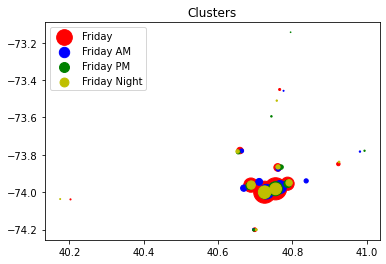

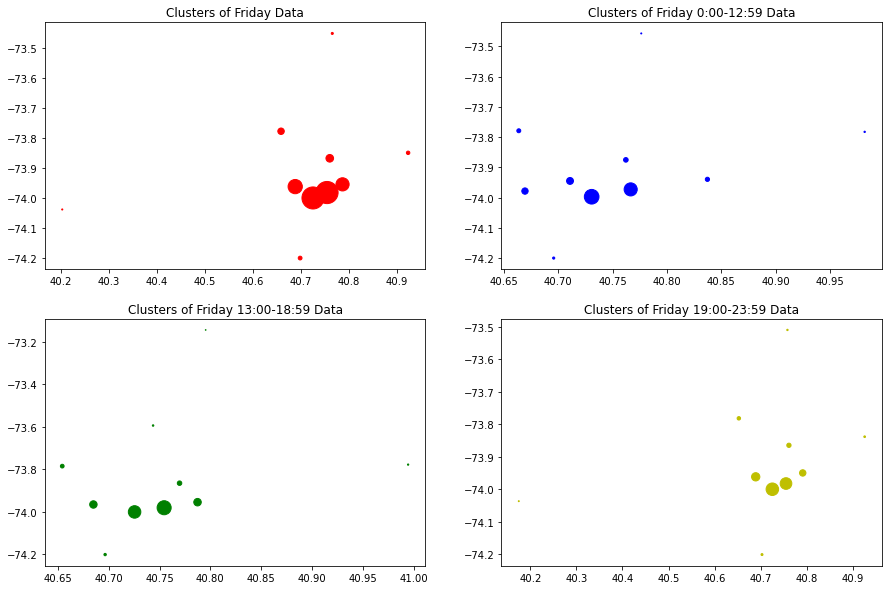

In [15]:
from sklearn.cluster import KMeans
num_clusters = 10
def kmeans_alg(num_clusters, data):
    result = []
    X = data[['Lat','Lon']].to_numpy()
    kms = KMeans(n_clusters = num_clusters)
    y = kms.fit_predict(X)
    #find center
    centers = kms.cluster_centers_
    result.append(centers)
    cluster_count = [0]*num_clusters
    #count points in each center
    for item in y:
        cluster_count[item] +=1
    #find max cluster
    cluster_max=0
    max_index = 0
    for i in range(len(cluster_count)):
        if cluster_count[i] > cluster_max:
            cluster_max = cluster_count[i]
            max_index = i
        cluster_count[i] = cluster_count[i]/100
    result.append(centers[max_index])
    result.append(cluster_max)
    return result, cluster_count
kms_results = []
r_f, cluster_count_f = kmeans_alg(num_clusters, uber_friday)
r_fam,cluster_count_fam  = kmeans_alg(num_clusters, uber_friday_am)
r_fpm,cluster_count_fpm = kmeans_alg(num_clusters, uber_friday_pm )
r_fni,cluster_count_fni = kmeans_alg(num_clusters, uber_friday_ni)
kms_results.append(r_f)
kms_results.append(r_fam)
kms_results.append(r_fpm)
kms_results.append(r_fni)

friday_table = pd.DataFrame(kms_results,columns=["centers","center of max cluster", "max cluster count"], index=["Friday", "Friday_am",
                                                                                                  "Friday_pm",
                                                                                                  "Friday_night"])
s1 = plt.scatter(r_f[0][:,0], r_f[0][:,1], s= cluster_count_f, marker='o', c='r')
s2 = plt.scatter(r_fam[0][:,0], r_fam[0][:,1], s= cluster_count_fam, marker='o', c='b')
s3 = plt.scatter(r_fpm[0][:,0], r_fpm[0][:,1], s= cluster_count_fpm, marker='o', c='g')
s4 = plt.scatter(r_fni[0][:,0], r_fni[0][:,1], s= cluster_count_fni, marker='o', c='y')
plt.title("Clusters")
plt.legend((s1,s2,s3,s4),('Friday','Friday AM','Friday PM','Friday Night'), loc='best')
fig,axs = plt.subplots(2,2, figsize=(15, 10))
axs[0][0].scatter(r_f[0][:,0], r_f[0][:,1], s= cluster_count_f, marker='o', c='r')
axs[0][0].set_title("Clusters of Friday Data")
axs[0][1].scatter(r_fam[0][:,0], r_fam[0][:,1], s= cluster_count_fam, marker='o', c='b')
axs[0][1].set_title("Clusters of Friday 0:00-12:59 Data")
axs[1][0].scatter(r_fpm[0][:,0], r_fpm[0][:,1], s= cluster_count_fpm, marker='o', c='g')
axs[1][0].set_title("Clusters of Friday 13:00-18:59 Data")
axs[1][1].scatter(r_fni[0][:,0], r_fni[0][:,1], s= cluster_count_fni, marker='o', c='y')
axs[1][1].set_title("Clusters of Friday 19:00-23:59 Data")
plt.show()

Text(0.5, 1.0, 'Clustering Uber Data')

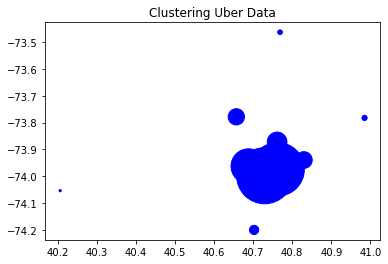

In [16]:
r, cluster_count_r = kmeans_alg(num_clusters, uber_data)
plt.scatter(r[0][:,0], r[0][:,1], s= cluster_count_r, marker='o', c='b')
plt.title("Clustering Uber Data")

In [17]:
r

[array([[ 40.82976925, -73.93999626],
        [ 40.72947354, -73.99857469],
        [ 40.65687204, -73.77877275],
        [ 40.70236476, -74.20061064],
        [ 40.76136635, -73.87244631],
        [ 40.76257125, -73.97452816],
        [ 40.68794592, -73.96307859],
        [ 40.76889276, -73.46330893],
        [ 40.20581723, -74.05435471],
        [ 40.98519923, -73.7828264 ]]),
 array([ 40.72947354, -73.99857469]),
 314213]

<function matplotlib.pyplot.show(*args, **kw)>

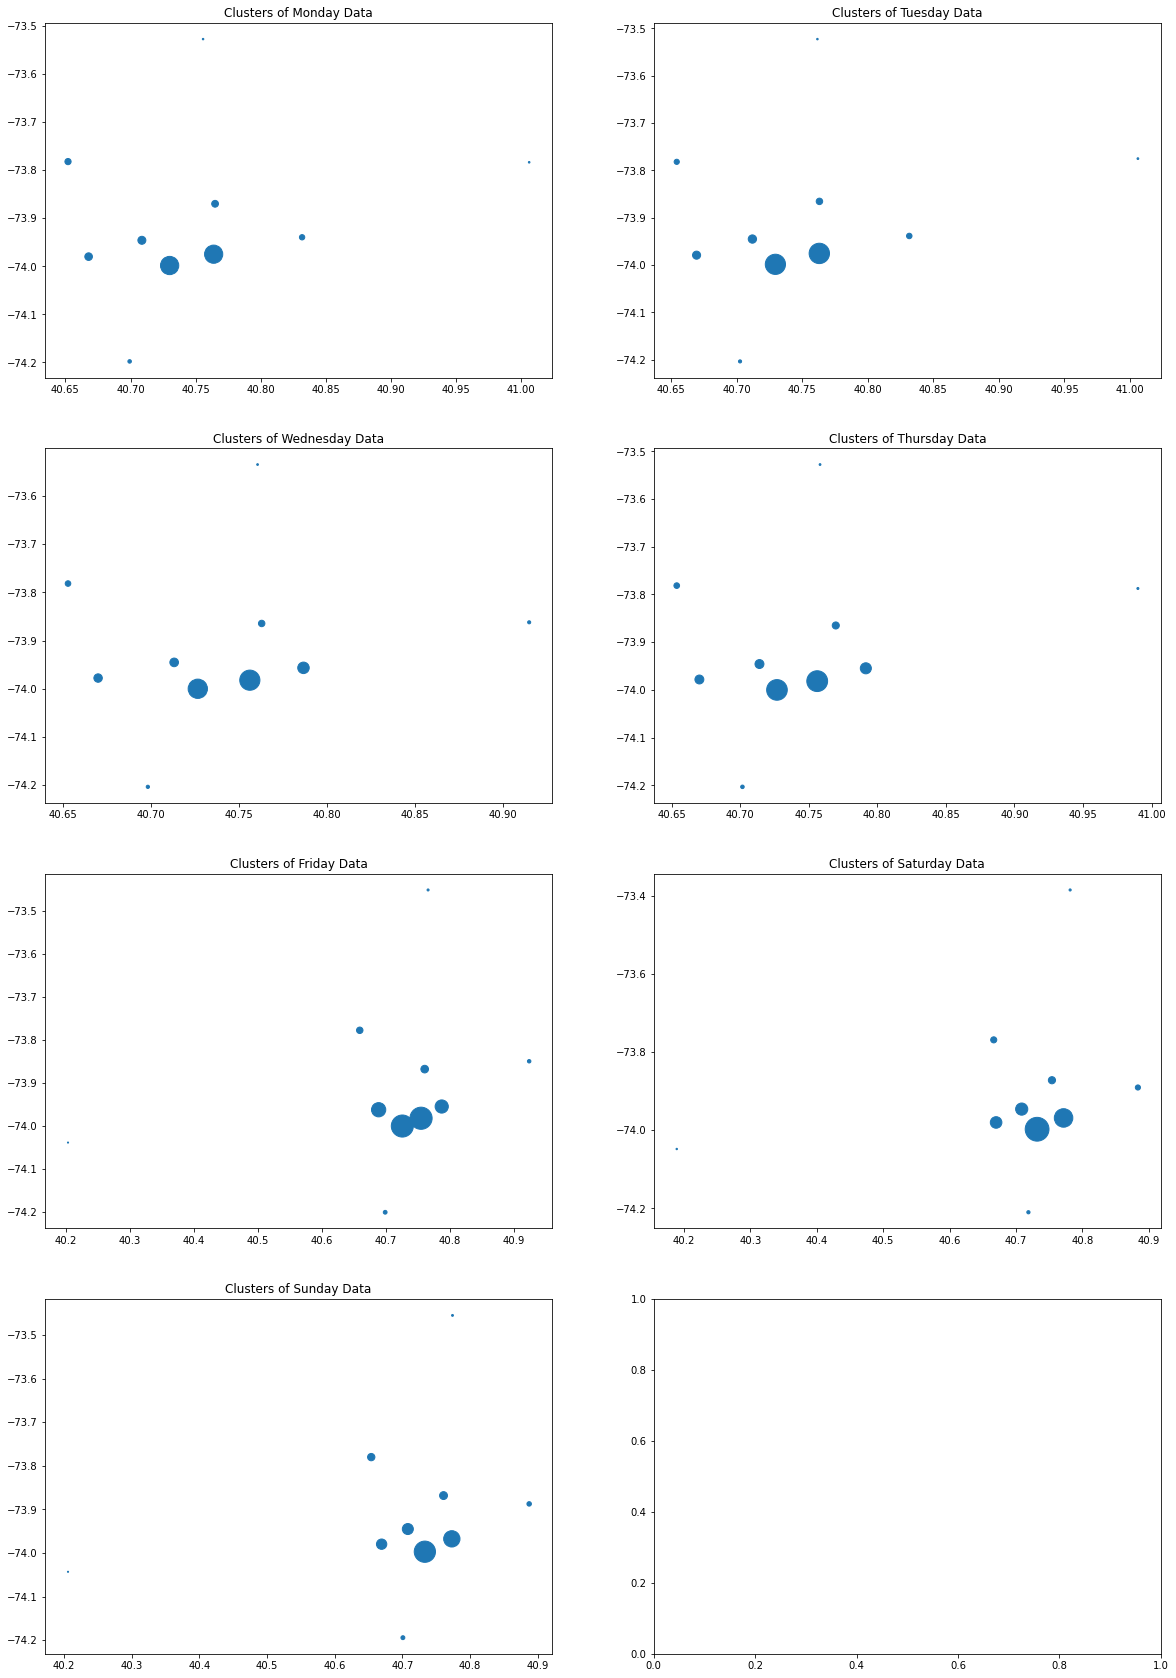

In [18]:
weekday_results = []
r1, cluster_count_r1 = kmeans_alg(num_clusters, uber_monday)
r2, cluster_count_r2  = kmeans_alg(num_clusters, uber_tuesday)
r3, cluster_count_r3 = kmeans_alg(num_clusters, uber_wednesday )
r4, cluster_count_r4 = kmeans_alg(num_clusters, uber_thursday)
r6, cluster_count_r6 = kmeans_alg(num_clusters, uber_saturday)
r7, cluster_count_r7 = kmeans_alg(num_clusters, uber_sunday)
weekday_results.append(r1)
weekday_results.append(r2)
weekday_results.append(r3)
weekday_results.append(r4)
weekday_results.append(r_f)
weekday_results.append(r6)
weekday_results.append(r7)
column_list = ["centers","center of max cluster", "max cluster count"]
index_list =["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_table = pd.DataFrame(weekday_results,columns=column_list, index=index_list)
fig,axs = plt.subplots(4,2, figsize=(20, 30))
axs[0][0].scatter(r1[0][:,0], r1[0][:,1], s= cluster_count_r1, marker='o')
axs[0][0].set_title("Clusters of Monday Data")
axs[0][1].scatter(r2[0][:,0], r2[0][:,1], s= cluster_count_r2, marker='o')
axs[0][1].set_title("Clusters of Tuesday Data")
axs[1][0].scatter(r3[0][:,0], r3[0][:,1], s= cluster_count_r3, marker='o')
axs[1][0].set_title("Clusters of Wednesday Data")
axs[1][1].scatter(r4[0][:,0], r4[0][:,1], s= cluster_count_r4, marker='o')
axs[1][1].set_title("Clusters of Thursday Data")
axs[2][0].scatter(r_f[0][:,0], r_f[0][:,1], s= cluster_count_f, marker='o')
axs[2][0].set_title("Clusters of Friday Data")
axs[2][1].scatter(r6[0][:,0], r6[0][:,1], s= cluster_count_r6, marker='o')
axs[2][1].set_title("Clusters of Saturday Data")
axs[3][0].scatter(r7[0][:,0], r7[0][:,1], s= cluster_count_r7, marker='o')
axs[3][0].set_title("Clusters of Sunday Data")
plt.show

In [19]:
weekday_table

,centers,center of max cluster,max cluster count
Monday,"[[41.006072440944884, -73.78350866141733], [40...","[40.73001031888749, -73.99829553737338]",33366
Tuesday,"[[40.72956488719415, -73.99846692821002], [40....","[40.763058669340225, -73.97541101152369]",41465
Wednesday,"[[40.786544043376054, -73.95657307196481], [40...","[40.75608938268569, -73.98215403590753]",40669
Thursday,"[[40.72679143617147, -74.0000583201902], [40.6...","[40.75613882986095, -73.98166157666189]",43242
Friday,"[[40.7255878454178, -73.99984607770354], [40.7...","[40.754829101272264, -73.98172971603053]",49072
Saturday,"[[40.71865105162524, -74.20993757170172], [40....","[40.731737317542404, -73.99730097604886]",56564
Sunday,"[[40.88735132965379, -73.88727285499247], [40....","[40.73319322101353, -73.99694482842487]",45136


In [20]:
friday_table

,centers,center of max cluster,max cluster count
Friday,"[[40.7255878454178, -73.99984607770354], [40.7...","[40.754829101272264, -73.98172971603053]",49072
Friday_am,"[[40.76214756731223, -73.87509537080774], [40....","[40.73066139328984, -73.99691896085741]",21459
Friday_pm,"[[40.725449598921905, -74.00088519540525], [40...","[40.75449791497976, -73.9811560728745]",19737
Friday_night,"[[40.72533227226333, -73.9997013268691], [40.6...","[40.72533227226333, -73.9997013268691]",15682


In [21]:
#because the data is huge and use sample to do DBSCAN
# use contant 'NUM' to control the length of sample
NUM = 10000
sample_uber = uber_data.sample(n=NUM)
sample_friday = uber_friday.sample(n=NUM)
sample_friday_am = uber_friday_am.sample(n=NUM)
sample_friday_pm = uber_friday_pm.sample(n=NUM)
sample_friday_ni = uber_friday_ni.sample(n=NUM)

sample_monday = uber_monday.sample(n=NUM)
sample_tuesday = uber_tuesday.sample(n=NUM)
sample_wednesday = uber_wednesday.sample(n=NUM)
sample_thursday = uber_thursday.sample(n=NUM)
sample_saturday = uber_saturday.sample(n=NUM)
sample_sunday = uber_sunday.sample(n=NUM)
test_uber = sample_uber[['Lat','Lon']].to_numpy()
test_friday = sample_friday[['Lat','Lon']].to_numpy()
test_friday_am = sample_friday_am[['Lat','Lon']].to_numpy()
test_friday_pm = sample_friday_pm[['Lat','Lon']].to_numpy()
test_friday_ni = sample_friday_ni[['Lat','Lon']].to_numpy()

test_monday = sample_monday[['Lat','Lon']].to_numpy()
test_tuesday = sample_tuesday[['Lat','Lon']].to_numpy()
test_wednesday = sample_wednesday[['Lat','Lon']].to_numpy()
test_thursday = sample_thursday[['Lat','Lon']].to_numpy() 
test_saturday = sample_saturday[['Lat','Lon']].to_numpy() 
test_sunday = sample_sunday[['Lat','Lon']].to_numpy()

In [22]:
list_dbs = [] #save the number of clusters in DBSCAN
dbs = DBSCAN(eps=0.005, min_samples = 20, algorithm='ball_tree', metric='euclidean')

y_dbs_uber = dbs.fit_predict(test_uber)
cluster_labels_uber = dbs.labels_
list_dbs.append(len(set(cluster_labels_uber)))

y_dbs_1 = dbs.fit_predict(test_monday)
cluster_labels1 = dbs.labels_
list_dbs.append(len(set(cluster_labels1)))

y_dbs_2 = dbs.fit_predict(test_tuesday)
cluster_labels2 = dbs.labels_
list_dbs.append(len(set(cluster_labels2)))

y_dbs_3 = dbs.fit_predict(test_wednesday)
cluster_labels3 = dbs.labels_
list_dbs.append(len(set(cluster_labels3)))

y_dbs_4 = dbs.fit_predict(test_thursday)
cluster_labels4 = dbs.labels_
list_dbs.append(len(set(cluster_labels4)))

y_dbs_5 = dbs.fit_predict(test_friday)
cluster_labels5 = dbs.labels_
list_dbs.append(len(set(cluster_labels5)))

y_dbs_6 = dbs.fit_predict(test_saturday)
cluster_labels6 = dbs.labels_
list_dbs.append(len(set(cluster_labels6)))

y_dbs_7 = dbs.fit_predict(test_sunday)
cluster_labels7 = dbs.labels_
list_dbs.append(len(set(cluster_labels7)))

y_dbs_fam = dbs.fit_predict(test_friday_am)
cluster_labels8 = dbs.labels_
list_dbs.append(len(set(cluster_labels8)))

y_dbs_fpm = dbs.fit_predict(test_friday_pm)
cluster_labels9 = dbs.labels_
list_dbs.append(len(set(cluster_labels9)))

y_dbs_fni = dbs.fit_predict(test_friday_ni)
cluster_labels10 = dbs.labels_
list_dbs.append(len(set(cluster_labels10)))

print(list_dbs)

[13, 15, 13, 14, 10, 13, 16, 14, 10, 13, 15]


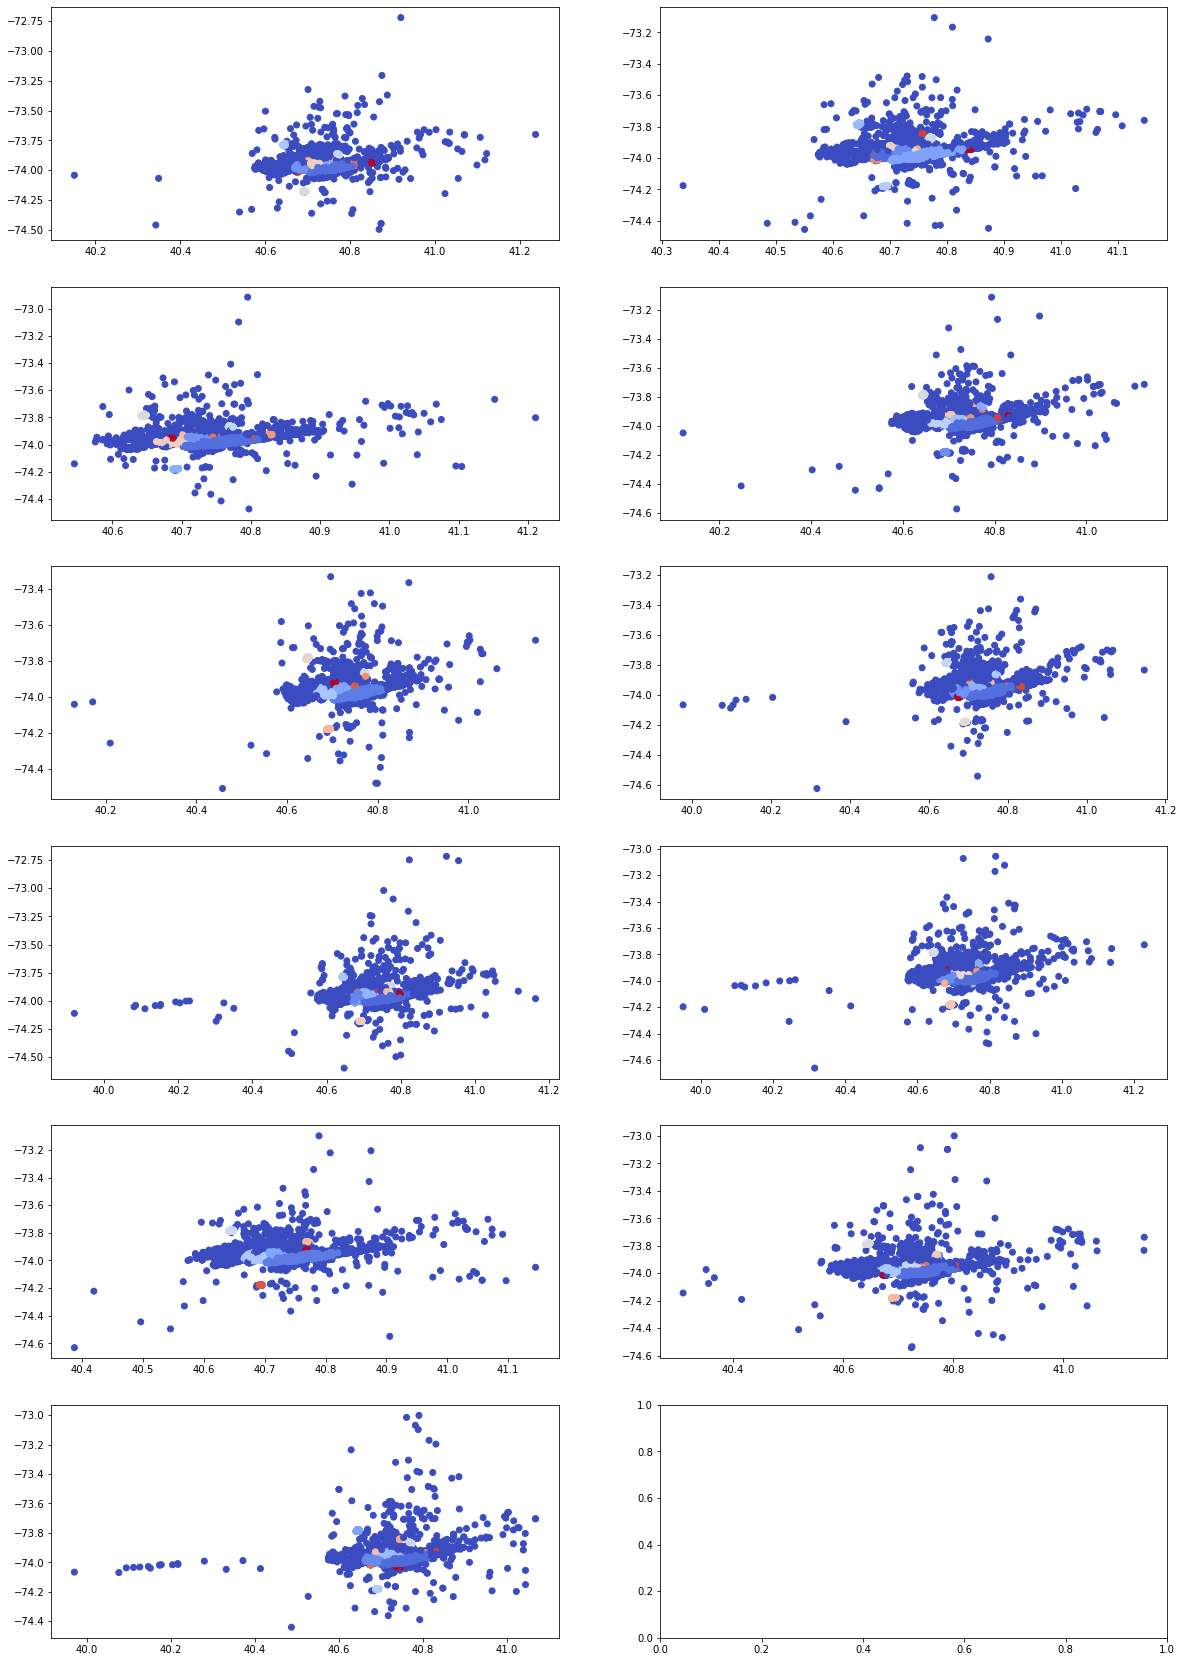

In [23]:
fig,axs = plt.subplots(6,2, figsize=(20, 30))
axs[0][0].scatter(test_uber[:,0], test_uber[:,1], c=y_dbs_uber, cmap="coolwarm")
axs[0][1].scatter(test_monday[:,0], test_monday[:,1], c=y_dbs_1, cmap="coolwarm")

axs[1][0].scatter(test_tuesday[:,0], test_tuesday[:,1], c=y_dbs_2, cmap="coolwarm")
axs[1][1].scatter(test_wednesday[:,0], test_wednesday[:,1], c=y_dbs_3, cmap="coolwarm")

axs[2][0].scatter(test_thursday[:,0], test_thursday[:,1], c=y_dbs_4, cmap="coolwarm")
axs[2][1].scatter(test_friday[:,0], test_friday[:,1], c=y_dbs_5, cmap="coolwarm")

axs[3][0].scatter(test_saturday[:,0], test_saturday[:,1], c=y_dbs_6, cmap="coolwarm")
axs[3][1].scatter(test_sunday[:,0], test_sunday[:,1], c=y_dbs_7, cmap="coolwarm")

axs[4][0].scatter(test_friday_am[:,0], test_friday_am[:,1], c=y_dbs_fam, cmap="coolwarm")
axs[4][1].scatter(test_friday_pm[:,0], test_friday_pm[:,1], c=y_dbs_fpm, cmap="coolwarm")

axs[5][0].scatter(test_friday_ni[:,0], test_friday_ni[:,1], c=y_dbs_fni, cmap="coolwarm")
plt.show()

In [24]:
#test1 = sample_uber.loc[(sample_uber.Lat >=40.6)&(sample_uber.Lat<=40.8)&(sample_uber.Lon >=(-74.2)&(sample_uber.Lon <=(-73.8)))]
sample_uber1 = sample_uber.loc[(sample_uber.Lat>=40.6) & (sample_uber.Lat<=40.8)]
sample_uber2 = sample_uber1.loc[(sample_uber.Lon>=(-74.05)) & (sample_uber.Lon<=(-73.9))]
sample_uber2

,Date/Time,Lat,Lon,Base,WeekDay,WeekDayName,Month,Day,Hour,Period,Count
335373,2014-08-07 19:03:00,40.7379,-73.9900,B02617,3,Thursday,8,7,19,Night,1
609056,2014-08-01 08:53:00,40.6873,-73.9898,B02682,4,Friday,8,1,8,AM,1
413208,2014-08-14 10:27:00,40.7440,-73.9512,B02617,3,Thursday,8,14,10,AM,1
39637,2014-08-01 21:53:00,40.7925,-74.0421,B02598,4,Friday,8,1,21,Night,1
420784,2014-08-14 20:58:00,40.7534,-73.9879,B02617,3,Thursday,8,14,20,Night,1
...,...,...,...,...,...,...,...,...,...,...,...
161984,2014-08-18 12:52:00,40.7515,-73.9937,B02598,0,Monday,8,18,12,AM,1
610736,2014-08-01 14:52:00,40.7369,-73.9928,B02682,4,Friday,8,1,14,PM,1
469265,2014-08-19 10:51:00,40.7488,-73.9930,B02617,1,Tuesday,8,19,10,AM,1
218704,2014-08-26 21:09:00,40.7237,-74.0113,B02598,1,Tuesday,8,26,21,Night,1


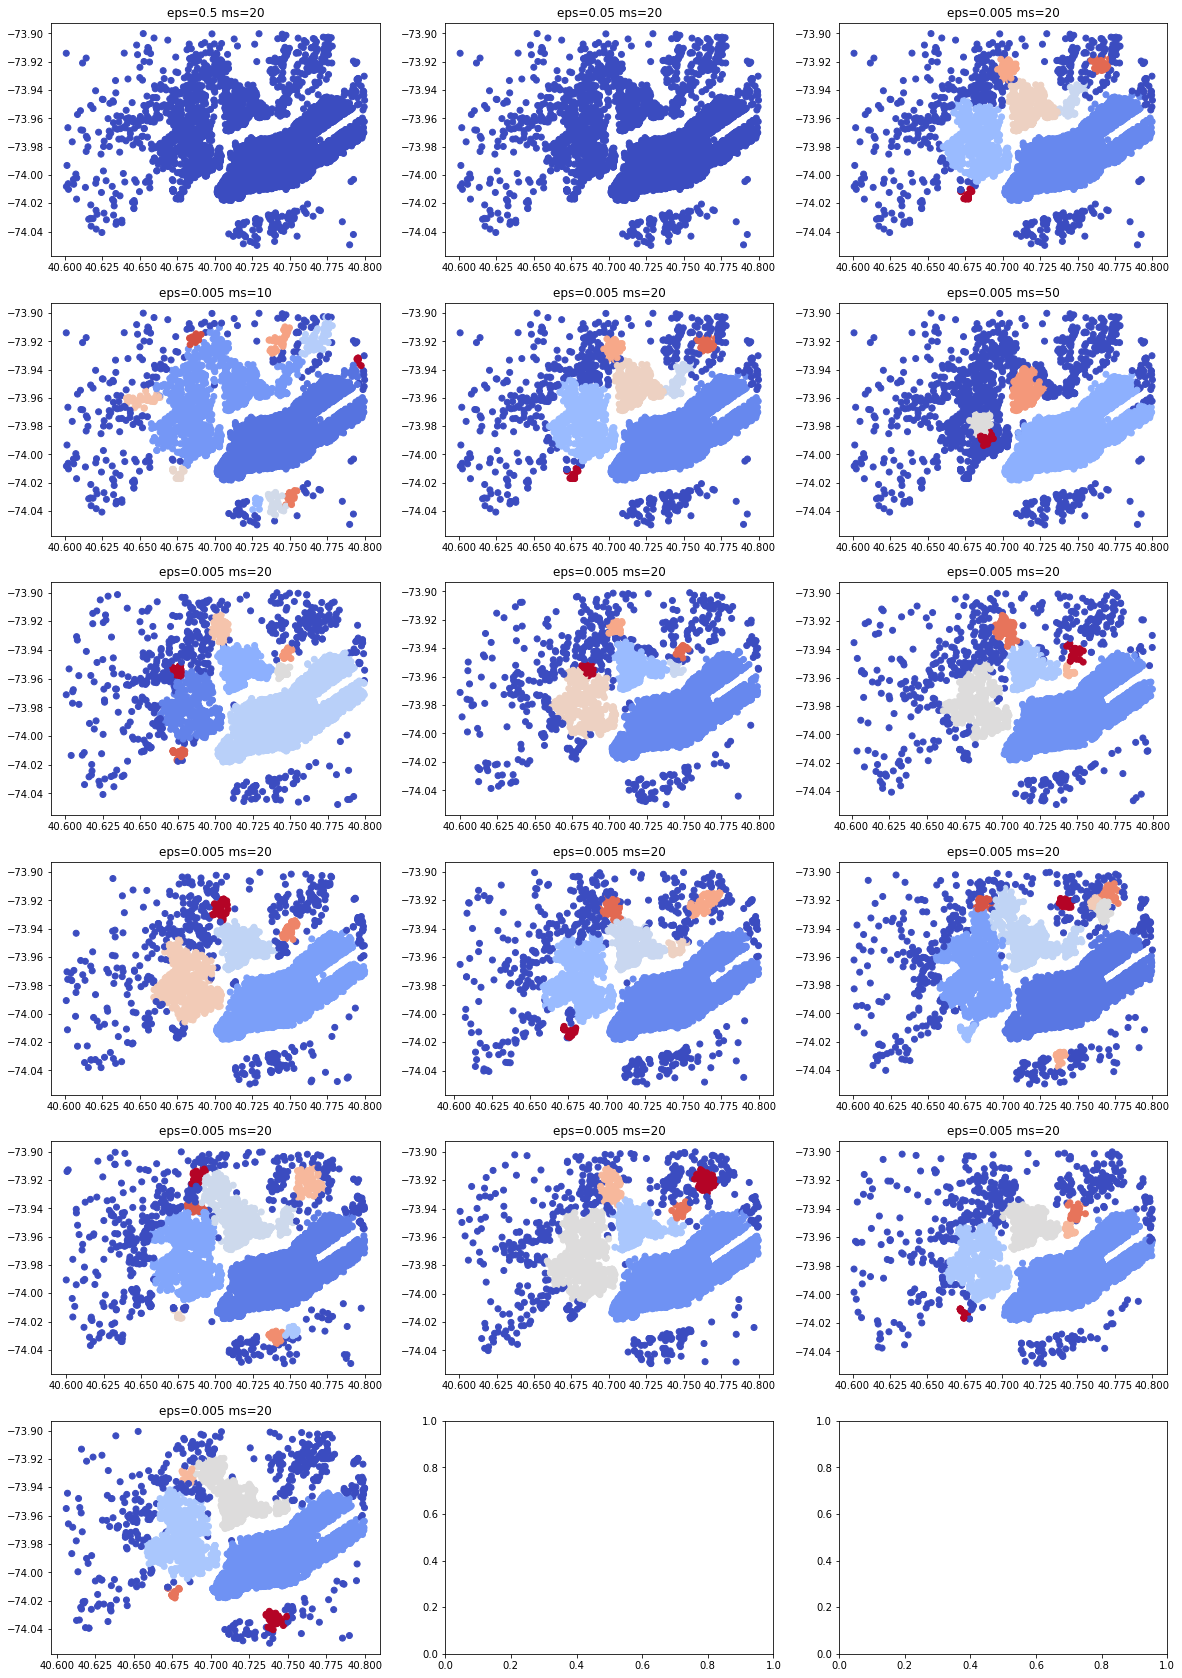

In [25]:

def detail_dbscan(data,axs, x, y, EPS, MS, counts, title):
    sample1 = data.loc[(data.Lat>=40.6) & (data.Lat<=40.8)]
    sample2 = sample1.loc[(data.Lon>=(-74.05)) & (data.Lon<=(-73.9))]
    test = sample2[['Lat','Lon']].to_numpy()
    dbs = DBSCAN(eps=EPS, min_samples = MS, algorithm='ball_tree', metric='euclidean')
    y_dbs = dbs.fit_predict(test)
    cluster_labels = dbs.labels_
    counts.append(len(set(cluster_labels)))
    axs[x][y].scatter(test[:,0], test[:,1], c=y_dbs, cmap="coolwarm")
    axs[x][y].set_title(title)
#change eps: 0.5, 0.05, 0.005 for data
counts_detail=[]
fig,axs = plt.subplots(6,3, figsize=(20, 30))
detail_dbscan(sample_uber, axs, 0,0, 0.5, 20, counts_detail, "eps=0.5 ms=20")
detail_dbscan(sample_uber, axs, 0,1, 0.05, 20, counts_detail,"eps=0.05 ms=20" )
detail_dbscan(sample_uber, axs, 0,2, 0.005, 20, counts_detail, "eps=0.005 ms=20")
#change min samples: 10, 20, 50
detail_dbscan(sample_uber, axs, 1,0, 0.005, 10, counts_detail, "eps=0.005 ms=10")
detail_dbscan(sample_uber, axs, 1,1, 0.005, 20, counts_detail, "eps=0.005 ms=20")
detail_dbscan(sample_uber, axs, 1,2, 0.005, 50, counts_detail, "eps=0.005 ms=50")

detail_dbscan(sample_monday, axs, 2,0, 0.005, 20, counts_detail, "eps=0.005 ms=20")
detail_dbscan(sample_tuesday, axs, 2,1, 0.005, 20, counts_detail,"eps=0.005 ms=20")
detail_dbscan(sample_wednesday, axs, 2,2, 0.005, 20, counts_detail,"eps=0.005 ms=20")

detail_dbscan(sample_thursday, axs, 3,0, 0.005, 20, counts_detail, "eps=0.005 ms=20")
detail_dbscan(sample_friday, axs, 3,1, 0.005, 20, counts_detail, "eps=0.005 ms=20")
detail_dbscan(sample_saturday, axs, 3,2, 0.005, 20, counts_detail, "eps=0.005 ms=20")

detail_dbscan(sample_sunday, axs, 4,0, 0.005, 20, counts_detail, "eps=0.005 ms=20")
detail_dbscan(sample_friday_am, axs, 4,1, 0.005, 20, counts_detail, "eps=0.005 ms=20")
detail_dbscan(sample_friday_pm, axs, 4,2, 0.005, 20, counts_detail, "eps=0.005 ms=20")

detail_dbscan(sample_friday_ni, axs, 5,0, 0.005, 20, counts_detail, "eps=0.005 ms=20")

plt.show()

In [26]:
counts_detail

[1, 1, 8, 12, 8, 5, 9, 8, 7, 6, 8, 11, 10, 7, 7, 7]